# Titulo: The Picture of Dorian Gray
Texto: https://www.gutenberg.org/cache/epub/174/pg174.txt

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade numpy spacy gensim textnets matplotlib scipy nltk python-louvain
!python -m spacy download en_core_web_sm
!pip install gensim
!pip install scipy
!pip install nltk
!pip install python-louvain
%pip install textnets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.4 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.

In [ ]:
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import string
import spacy
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, QuadgramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures, QuadgramAssocMeasures
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
import numpy as np
import networkx as nx
import community
import community.community_louvain
import community as community_louvain
import textnets as tn

In [ ]:
import urllib.request

url = "https://www.gutenberg.org/cache/epub/174/pg174.txt"
response = urllib.request.urlopen(url)
text = response.read().decode('utf-8')

print(text)

﻿The Project Gutenberg eBook of The Picture of Dorian Gray
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Picture of Dorian Gray

Author: Oscar Wilde

Release date: October 1, 1994 [eBook #174]
                Most recently updated: September 18, 2024

Language: English

Credits: Judith Boss. HTML version by Al Haines.


*** START OF THE PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY ***




The Picture of Dorian Gray

by Oscar Wilde


Contents

 THE PREFACE
 CHAPTER I.
 CHAPTER II.
 CHAPTER III.
 CHAPTER IV.
 CHAPTER V.
 CHAPTER VI.
 CHAPTER VII.
 CHAPTER VIII.
 CHAPTER IX.
 

1. Genere una visualización utilizando la ley de Zipf para ver la calidad del corpus a analizar. Justifique la calidad del corpus en base al grafico presentado.

In [ ]:
words = re.findall(r'\b\w+\b', text.lower())  # Find all words, convert to lowercase
word_counts = Counter(words)  # Count word frequencies

In [ ]:
frequencies = list(word_counts.values())
frequencies.sort(reverse=True)  # Sort frequencies in descending order

ranks = range(1, len(frequencies) + 1)  # Generate ranks for words

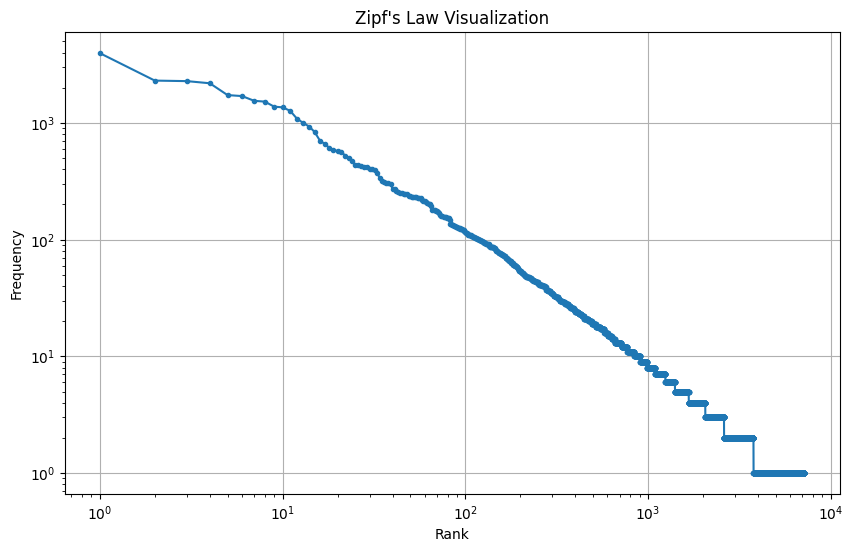

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='-', markersize=3)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Visualization")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

A pesar del patrón "escalonado", la linealidad general en la parte central de la visualización sugiere que el corpus sigue en gran medida la Ley de Zipf. Se trata de una señal positiva, que indica que el texto presenta propiedades de lenguaje natural.

2. Contar el número total de palabras en el corpus.

In [ ]:
# Divide el texto en palabras usando espacios como delimitadores.
words = text.split()

# Cuenta el número total de palabras.
total_words = len(words)

# Imprime el resultado.
print(f"Número total de palabras en el corpus: {total_words}")

Número total de palabras en el corpus: 82024


Total de palabras en el corpus: 82024

3. Contar la cantidad de palabras únicas en el texto.

In [ ]:
# Divide el texto en palabras y conviértelas a minúsculas.
words = re.findall(r'\b\w+\b', text.lower())

# Crea un conjunto para almacenar palabras únicas.
unique_words = set(words)

# Cuenta el número de palabras únicas.
num_unique_words = len(unique_words)

# Imprime el resultado.
print(f"Número de palabras únicas en el corpus: {num_unique_words}")

Número de palabras únicas en el corpus: 7168


Palabras únicas en el corpus: 7168

4. Contar el número de palabras que comienzan con letras mayúsculas.

In [ ]:
# Define a regular expression pattern to match words starting with a capital letter
pattern = r'\b[A-Z]\w*\b'

# Find all matches in the text
capitalized_words = re.findall(pattern, text)

# Count the number of capitalized words
num_capitalized_words = len(capitalized_words)

# Print the result
print(f"Número de palabras que comienzan con letras mayúsculas: {num_capitalized_words}")

Número de palabras que comienzan con letras mayúsculas: 10763


Palabras que comienzan con letras mayúsculas: 10763

5. Contar el número de palabras que comienzan con letras minúsculas.

In [ ]:
# Define a regular expression pattern to match words starting with a lowercase letter
pattern = r'\b[a-z]\w*\b'

# Find all matches in the text
lowercase_words = re.findall(pattern, text)

# Count the number of lowercase words
num_lowercase_words = len(lowercase_words)

# Print the result
print(f"Número de palabras que comienzan con letras minúsculas: {num_lowercase_words}")

Número de palabras que comienzan con letras minúsculas: 72675


Palabras que comienzan con letras minúsculas: 72675

6. Contar la frecuencia de las palabras cerradas (stopwords) en el corpus.

In [ ]:
# Descarga las stopwords si aún no lo has hecho
nltk.download('stopwords')

# Obtén la lista de stopwords en inglés (puedes cambiar el idioma si es necesario)
stop_words = set(stopwords.words('english'))

# Divide el texto en palabras y conviértelas a minúsculas
words = re.findall(r'\b\w+\b', text.lower())

# Filtra las palabras para que solo queden las stopwords
stopwords_in_text = [word for word in words if word in stop_words]

# Cuenta la frecuencia de cada stopword
stopword_counts = Counter(stopwords_in_text)

# Imprime las frecuencias
print(stopword_counts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Counter({'the': 3956, 'of': 2301, 'and': 2277, 'to': 2183, 'a': 1729, 'i': 1696, 'he': 1544, 'you': 1520, 'that': 1376, 'it': 1358, 'in': 1269, 'was': 1085, 'his': 996, 'is': 930, 'had': 833, 'with': 706, 'him': 661, 'for': 613, 'as': 583, 'at': 575, 'have': 568, 'me': 523, 'not': 502, 'be': 470, 'her': 439, 'she': 431, 't': 418, 'but': 400, 'what': 400, 'are': 396, 'on': 369, 'there': 339, 'they': 320, 'all': 311, 'my': 303, 'or': 297, 's': 274, 'from': 269, 'don': 255, 'were': 251, 'so': 249, 'if': 246, 'by': 244, 'been': 236, 'an': 234, 'am': 232, 'about': 231, 'no': 228, 'who': 228, 'some': 225, 'when': 219, 'your': 216, 'will': 209, 'them': 203, 'do': 202, 'this': 193, 'we': 178, 'has': 171, 'over': 169, 'into': 159, 'can': 157, 'out': 157, 'their': 156, 'any': 154, 'up': 153, 'how': 153, 'then': 147, 'more': 137, 'now': 134, 'own': 130, 'its': 129, 'which': 126, 'than': 124, 'very': 124, 'should': 116, 'only': 113, 'himself': 106, 'too': 106, 'after': 103, 'down': 101, 'did': 100

Counter({'the': 3956, 'of': 2301, 'and': 2277, 'to': 2183, 'a': 1729, 'i': 1696, 'he': 1544, 'you': 1520, 'that': 1376, 'it': 1358, 'in': 1269, 'was': 1085, 'his': 996, 'is': 930, 'had': 833, 'with': 706, 'him': 661, 'for': 613, 'as': 583, 'at': 575, 'have': 568, 'me': 523, 'not': 502, 'be': 470, 'her': 439, 'she': 431, 't': 418, 'but': 400, 'what': 400, 'are': 396, 'on': 369, 'there': 339, 'they': 320, 'all': 311, 'my': 303, 'or': 297, 's': 274, 'from': 269, 'don': 255, 'were': 251, 'so': 249, 'if': 246, 'by': 244, 'been': 236, 'an': 234, 'am': 232, 'about': 231, 'no': 228, 'who': 228, 'some': 225, 'when': 219, 'your': 216, 'will': 209, 'them': 203, 'do': 202, 'this': 193, 'we': 178, 'has': 171, 'over': 169, 'into': 159, 'can': 157, 'out': 157, 'their': 156, 'any': 154, 'up': 153, 'how': 153, 'then': 147, 'more': 137, 'now': 134, 'own': 130, 'its': 129, 'which': 126, 'than': 124, 'very': 124, 'should': 116, 'only': 113, 'himself': 106, 'too': 106, 'after': 103, 'down': 101, 'did': 100, 'why': 92, 'other': 89, 'through': 86, 'such': 83, 'most': 80, 'once': 80, 'before': 77, 'our': 76, 'again': 72, 'those': 66, 'being': 63, 'where': 59, 'here': 51, 'myself': 47, 'just': 44, 'against': 43, 'few': 42, 'each': 41, 'because': 40, 'yourself': 36, 'having': 36, 'does': 35, 'won': 32, 'same': 31, 'these': 30, 'whom': 29, 'off': 26, 'both': 25, 'itself': 23, 'between': 21, 'didn': 20, 'under': 19, 'while': 19, 'doing': 18, 'themselves': 18, 'o': 16, 'herself': 15, 'doesn': 12, 'ourselves': 11, 'during': 11, 'isn': 8, 'nor': 7, 'yours': 7, 'wasn': 7, 'below': 7, 'll': 6, 'd': 6, 'mustn': 5, 'ain': 5, 'hers': 5, 'shan': 5, 'couldn': 4, 'wouldn': 4, 'hadn': 4, 'shouldn': 4, 'theirs': 3, 'above': 3, 'further': 3, 're': 2, 'ours': 2, 'hasn': 2, 'until': 2, 've': 1, 'haven': 1})

7. Identificar y contar las palabras más comunes en el texto.

In [ ]:
# 1. Tokenizar el texto
words = re.findall(r'\b\w+\b', text.lower())

# 2. Eliminar las stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# 3. Contar la frecuencia de las palabras
word_counts = Counter(words)

# 4. Ordenar las palabras por frecuencia
most_common_words = word_counts.most_common(10)

# 5. Mostrar los resultados
print("Palabras más comunes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Palabras más comunes:
one: 438
dorian: 419
would: 308
said: 262
lord: 248
henry: 236
life: 232
like: 213
gray: 204
man: 180


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más comunes:

one: 438

dorian: 419

would: 308

said: 262

lord: 248

henry: 236

life: 232

like: 213

gray: 204

man: 180

8. Identificar y contar la frecuencia de nombres propios en el corpus.

In [ ]:
# Descarga los recursos necesarios si aún no lo has hecho
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Tokeniza el texto en palabras
words = word_tokenize(text)

# Etiqueta las palabras con sus categorías gramaticales (POS tagging)
tagged_words = pos_tag(words)

# Define una función para identificar nombres propios
def is_proper_noun(word, tag):
    return tag == 'NNP' and re.match(r'^[A-Z][a-z]*$', word) is not None

# Encuentra los nombres propios y cuenta su frecuencia
proper_nouns = [word for word, tag in tagged_words if is_proper_noun(word, tag)]
proper_noun_counts = Counter(proper_nouns)

# Imprime los nombres propios y sus frecuencias
for name, count in proper_noun_counts.most_common(20): # Los 20 más comunes
    print(f"{name}: {count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Lord: 245
Henry: 234
Gray: 193
Harry: 166
Dorian: 164
Basil: 152
Hallward: 91
Sibyl: 79
Project: 78
Don: 61
Lady: 60
Vane: 55
My: 30
Alan: 30
Gutenberg: 28
Campbell: 28
Well: 26
How: 25
God: 25
Ah: 24


Lord: 245

Henry: 234

Gray: 193

Harry: 166

Dorian: 164

Basil: 152

Hallward: 91

Sibyl: 79

Project: 78

Don: 61

Lady: 60

Vane: 55

My: 30

Alan: 30

Gutenberg: 28

Campbell: 28

Well: 26

How: 25

God: 25

Ah: 24

9. Contar el número total de oraciones en el corpus.

In [ ]:
# Descarga el modelo 'punkt' si aún no lo has hecho
nltk.download('punkt')

# Divide el texto en oraciones
sentences = nltk.sent_tokenize(text)

# Cuenta el número de oraciones
total_sentences = len(sentences)

# Imprime el resultado
print(f"Número total de oraciones en el corpus: {total_sentences}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Número total de oraciones en el corpus: 5568


Total de oraciones en el corpus: 5568

10. Calcular la longitud promedio de las oraciones.

In [ ]:
sentence_lengths = [len(sentence.split()) for sentence in sentences]
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)
print(f"Longitud promedio de las oraciones: {average_sentence_length:.2f}")

Longitud promedio de las oraciones: 14.73


Longitud promedio de las oraciones: 14.73

11. Contar cuántas veces aparecen cada uno de los signos de puntuación.

In [ ]:
# Define los signos de puntuación que quieres contar
punctuation_chars = string.punctuation

# Crea un diccionario para almacenar las frecuencias
punctuation_counts = {}

# Recorre el texto y cuenta la frecuencia de cada signo de puntuación
for char in text:
    if char in punctuation_chars:
        punctuation_counts[char] = punctuation_counts.get(char, 0) + 1

# Imprime las frecuencias
for char, count in punctuation_counts.items():
    print(f"'{char}': {count}")

'.': 6049
',': 5542
'-': 581
':': 50
'[': 1
'#': 1
']': 1
'*': 12
';': 156
'?': 575
'!': 390
'_': 136
'(': 17
')': 17
'/': 6
'%': 1
'$': 2


'.': 6049

',': 5542

'-': 581

':': 50

'[': 1

'#': 1

']': 1

'*': 12

';': 156

'?': 575

'!': 390

'_': 136

'(': 17

')': 17

'/': 6

'%': 1

'$': 2

12. Encontrar las palabras más largas en el texto.

In [ ]:
# Encuentra todas las palabras en el texto
words = re.findall(r'\b\w+\b', text.lower())

# Ordena las palabras por longitud en orden descendente
longest_words = sorted(words, key=len, reverse=True)

# Imprime las 10 palabras más largas
print("Las 10 palabras más largas en el texto:")
for word in longest_words[:10]:
    print(word)

Las 10 palabras más largas en el texto:
responsibilities
unenforceability
extraordinarily
picturesqueness
extraordinarily
instantaneously
extraordinarily
sentimentalists
representations
nottinghamshire


Las 10 palabras más largas en el texto:
responsibilities

unenforceability

extraordinarily

picturesqueness

extraordinarily

instantaneously

extraordinarily

sentimentalists

representations

nottinghamshire

13. Contar el número de oraciones interrogativas.

In [ ]:
# Descarga el modelo 'punkt' si aún no lo has hecho
nltk.download('punkt')

# Divide el texto en oraciones
sentences = nltk.sent_tokenize(text)

# Cuenta las oraciones interrogativas
interrogative_sentences_count = 0
for sentence in sentences:
    if sentence.endswith('?'):  # Verifica si la oración termina con un signo de interrogación
        interrogative_sentences_count += 1

# Imprime el resultado
print(f"Número de oraciones interrogativas en el corpus: {interrogative_sentences_count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Número de oraciones interrogativas en el corpus: 307


Oraciones interrogativas en el corpus: 307

14. Identificar y extraer entidades como nombres de personas, lugares y organizaciones.

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Project Gutenberg eBook PERSON
The Picture of Dorian Gray
    
 WORK_OF_ART
the United States GPE
the United States GPE
eBook PRODUCT
Title: The Picture of Dorian Gray

Author WORK_OF_ART
October 1, 1994 DATE
eBook PRODUCT
174 MONEY
September 18, 2024

 DATE
English LANGUAGE
Judith Boss PERSON
Al Haines PERSON
The Picture of Dorian Gray WORK_OF_ART
Oscar PERSON
PREFACE ORG
CHAPTER IX LAW
CHAPTER XIV PRODUCT
CHAPTER XVI LAW
CHAPTER XVIII LAW
The nineteenth century DATE
Caliban NORP
The nineteenth century DATE
Caliban NORP
OSCAR WORK_OF_ART
the light
summer DATE
Persian NORP
Henry
Wotton PERSON
Japanese NORP
Tokyo GPE
London GPE
Basil Hallward PERSON
some years ago DATE
Basil PERSON
Henry PERSON
next year DATE
Grosvenor GPE
Academy ORG
Grosvenor GPE
Oxford PERSON
Henry PERSON
only one CARDINAL
England GPE
Henry ORG
Basil PERSON
Basil PERSON
Narcissus PERSON
one CARDINAL
Church ORG
Church ORG
eighty CARDINAL
eighteen CARDINAL
winter DATE
summer DATE
Basil PERSON
Harry PERSON
Harry PERSON


15. Encontrar y extraer todas las citas directas (entre comillas) en el corpus.

In [ ]:
# Define a regular expression pattern to match text within double quotes
pattern = r'"([^"]*)"'  # Matches anything within double quotes, excluding the quotes themselves

# Find all matches in the text
quotes = re.findall(pattern, text)

# Print the extracted quotes
for quote in quotes:
    print(quote)

16. Detectar y extraer preguntas en el texto.

In [ ]:
nltk.download('punkt')

def detectar_preguntas(texto):
   preguntas = []
   oraciones = sent_tokenize(texto)  # Dividir el texto en oraciones.
   for oracion in oraciones:
     if oracion.endswith("?"):  # Verifica si la oración termina con un signo de interrogación.
       preguntas.append(oracion)
   return preguntas

preguntas_extraidas = detectar_preguntas(text)  # "text" es la variable que contiene el texto del libro.

for pregunta in preguntas_extraidas:
   print(pregunta)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


“Not send it anywhere?
My dear
fellow, why?
Have you any reason?
You shrug your shoulders?
Your rank and wealth, Harry; my brains, such as they are—my art,
whatever it may be worth; Dorian Gray’s good looks—we shall all suffer
for what the gods have given us, suffer terribly.”

“Dorian Gray?
How could I admire her?
Is that very vain of
me?
‘A dream of form in days of
thought’—who is it who says that?
I wonder can you realize all that that means?
You remember that
landscape of mine, for which Agnew offered me such a huge price but
which I would not part with?
And why is it so?
You don’t
really mind, Basil, do you?
After a few
moments he said to him, “Have you really a very bad influence, Lord
Henry?
Was there anything
so real as words?
Why had he not known
it?
Had it hit the mark?
Why had it been
left for a stranger to reveal him to himself?
And, yet, what was there to be
afraid of?
Will it
always be so?
You smile?
“Who wouldn’t like it?
What had happened?
How long will you like me?
Why

17. Identificar palabras que tienen más de un significado.

In [ ]:
# Descarga los recursos necesarios de WordNet
nltk.download('wordnet')

# Encuentra todas las palabras en el texto
words = re.findall(r'\b\w+\b', text.lower())

# Crea un conjunto para almacenar las palabras polisémicas
polysemous_words = set()

# Itera a través de las palabras y verifica si tienen más de un synset (significado) en WordNet
for word in words:
    synsets = wordnet.synsets(word)
    if len(synsets) > 1:
        polysemous_words.add(word)

# Imprime las palabras polisémicas
print("Palabras con más de un significado:")
for word in polysemous_words:
    print(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Se han truncado las últimas 5000 líneas del flujo de salida.
moved
dominated
mules
stamp
yellow
black
thrush
break
robe
use
becomes
editions
quit
tie
lose
affair
tears
waves
pulses
tarry
told
phantom
raised
tightened
called
flow
beater
danced
remembrance
sheer
downy
arch
gracious
invents
painting
slower
begun
gone
concern
masts
mirrors
admit
threads
viands
cave
reclining
coins
talked
acting
trojans
observe
lead
moulding
loves
squares
personal
suffer
incrusted
remedies
deep
cause
stumbled
diver
nuts
skies
addition
box
choking
arrested
placard
pencil
delighted
analysis
bare
size
drifting
spirit
blame
5
settling
attacking
jumped
tier
stock
accepted
lidded
flute
confession
shouldering
immobile
wounds
disclosed
eighteenth
lake
standard
leer
mysteries
elizabeth
duty
drive
intimate
fills
proposal
b
motive
unlawful
companions
trademark
horse
knocked
finished
sends
oval
creeping
lunch
movement
ladies
backed
northern
lilac
refreshed
do
otherwise
yacht
rage
ruff
unmoved
intoxicated
consistency
at

18. Encontrar los bigramas, trigramas y cuatrigramas más relevantes en el texto.

In [ ]:
# 1. Tokenizar el texto
words = nltk.word_tokenize(text)

# 2. Eliminar las stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

# 3. Encontrar bigramas
finder = BigramCollocationFinder.from_words(words)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)  # Los 20 mejores bigramas

# 4. Encontrar trigramas
finder = TrigramCollocationFinder.from_words(words)
trigrams = finder.nbest(TrigramAssocMeasures.likelihood_ratio, 20)  # Los 20 mejores trigramas

# 5. Encontrar cuatrigramas
finder = QuadgramCollocationFinder.from_words(words)
quadgrams = finder.nbest(QuadgramAssocMeasures.likelihood_ratio, 20)  # Los 20 mejores cuatrigramas

# Imprimir los resultados
print("Bigramas más relevantes:", bigrams)
print("\nTrigramas más relevantes:", trigrams)
print("\nCuatrigramas más relevantes:", quadgrams)

Bigramas más relevantes: [('Lord', 'Henry'), ('Dorian', 'Gray'), ('Sibyl', 'Vane'), ('Project', 'Gutenberg'), ('Basil', 'Hallward'), ('United', 'States'), ('said', 'Lord'), ('Lady', 'Narborough'), ('Literary', 'Archive'), ('shook', 'head'), ('electronic', 'works'), ('Gutenberg', 'Literary'), ('Project', 'electronic'), ('dear', 'fellow'), ('Archive', 'Foundation'), ('Prince', 'Charming'), ('Let', 'us'), ('shrugged', 'shoulders'), ('Adrian', 'Singleton'), ('Sir', 'Thomas')]

Trigramas más relevantes: [('said', 'Lord', 'Henry'), ('Lord', 'Henry', 'Wotton'), ('asked', 'Lord', 'Henry'), ('answered', 'Lord', 'Henry'), ('murmured', 'Lord', 'Henry'), ('cried', 'Lord', 'Henry'), ('Lord', 'Henry', 'laughing'), ('exclaimed', 'Lord', 'Henry'), ('Lord', 'Henry', 'elevating'), ('Lord', 'Henry', 'shrugged'), ('Lord', 'Henry', 'languidly'), ('Lord', 'Henry', 'laughed'), ('Lord', 'Henry', 'smiling'), ('friend', 'Lord', 'Henry'), ('Lord', 'Henry', 'helping'), ('broke', 'Lord', 'Henry'), ('Lord', 'Henry'

19. Identificar cuáles son los temas/tópicos más recurrentes en el texto.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#text = """ """ # Pega aquí el texto completo de "The Picture of Dorian Gray"
# Replace the empty string with your actual text content
# Example:
text = """The Picture of Dorian Gray is a philosophical novel by Oscar Wilde, first published complete in the July 1890 issue of Lippincott's Monthly Magazine. The story is about a young man named Dorian Gray who wishes to stay forever young while a portrait of him ages instead."""
text = text.lower() # Convertir a minúsculas
tokens = word_tokenize(text)
# Filter out stop words and non-alphanumeric tokens
tokens = [token for token in tokens if token not in stop_words and token.isalnum()]

# Create a dictionary and a corpus
# Ensure that 'tokens' is not empty before creating the dictionary
if tokens:
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]

    # Train the LDA model
    # Only proceed if the corpus is not empty
    if corpus and any(corpus[0]):  # Check if corpus and its first document are not empty
        lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

        # Print the topics
        for topic in lda_model.print_topics():
            print(topic)
    else:
        print("Corpus is empty. Please check your text input and preprocessing steps.")
else:
    print("Tokens list is empty. Please check your text input and preprocessing steps.")

(0, '0.038*"dorian" + 0.038*"young" + 0.038*"stay" + 0.038*"ages" + 0.038*"gray" + 0.038*"portrait" + 0.038*"complete" + 0.038*"july" + 0.038*"1890" + 0.038*"novel"')
(1, '0.038*"gray" + 0.038*"young" + 0.038*"stay" + 0.038*"dorian" + 0.038*"wishes" + 0.038*"1890" + 0.038*"published" + 0.038*"monthly" + 0.038*"forever" + 0.038*"lippincott"')
(2, '0.039*"dorian" + 0.038*"young" + 0.038*"gray" + 0.038*"lippincott" + 0.038*"1890" + 0.038*"story" + 0.038*"novel" + 0.038*"issue" + 0.038*"ages" + 0.038*"monthly"')
(3, '0.064*"gray" + 0.064*"young" + 0.064*"dorian" + 0.035*"magazine" + 0.035*"complete" + 0.035*"man" + 0.035*"july" + 0.035*"forever" + 0.035*"philosophical" + 0.035*"oscar"')
(4, '0.038*"instead" + 0.038*"oscar" + 0.038*"complete" + 0.038*"wishes" + 0.038*"1890" + 0.038*"stay" + 0.038*"ages" + 0.038*"portrait" + 0.038*"story" + 0.038*"picture"')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20. Visualizar en un grafo de coocurrencia los puntos donde cambia los temas a lo largo del texto.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


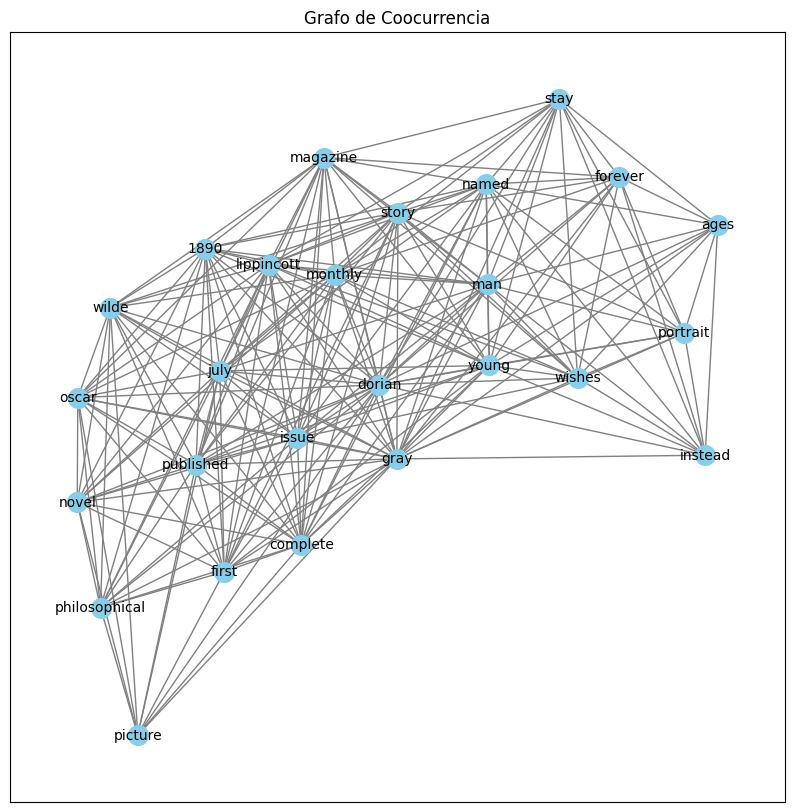

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def simple_preprocessing(text):
    """
    Preprocesamiento simple del texto usando NLTK:
    1. Tokeniza el texto.
    2. Elimina stop words y tokens no alfanuméricos.
    3. Convierte el texto a minúsculas.

    Args:
        text (str): El texto a preprocesar.

    Returns:
        list: Una lista de tokens preprocesados.
    """
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return tokens

def create_cooccurrence_graph(tokens, window_size=10):
    """
    Crea un grafo de coocurrencia usando networkx.

    Args:
        tokens (list): Una lista de tokens.
        window_size (int): El tamaño de la ventana para la coocurrencia.

    Returns:
        nx.Graph: El grafo de coocurrencia.
    """
    graph = nx.Graph()
    for i, token in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            if tokens[j] != token:  # Evitar auto-loops
                if graph.has_edge(token, tokens[j]):
                    graph[token][tokens[j]]['weight'] += 1
                else:
                    graph.add_edge(token, tokens[j], weight=1)
    return graph

# Preprocesa el texto
tokens = simple_preprocessing(text)

# Crea el grafo de coocurrencia
cooccurrence_graph = create_cooccurrence_graph(tokens, window_size=10)

# Visualiza el grafo
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura
pos = nx.spring_layout(cooccurrence_graph, k=0.3)  # Define la posición de los nodos
nx.draw_networkx(cooccurrence_graph, pos, with_labels=True, node_size=200,
                 node_color='skyblue', edge_color='gray', font_size=10)
plt.title("Grafo de Coocurrencia")
plt.show()

21. Aplicar las metricas de centralidad vistas en clase para determinar topicos relevantes sobre el grafo del punto previo.
+ Degree
+ Closeness
+ Betweenness

In [ ]:
# Degree Centrality
degree_centrality = nx.degree_centrality(cooccurrence_graph)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(cooccurrence_graph)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(cooccurrence_graph)

In [ ]:
# Ordenar nodos por Degree Centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Ordenar nodos por Closeness Centrality
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Ordenar nodos por Betweenness Centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

In [ ]:
# Imprimir los 10 nodos más importantes para cada métrica
print("Top 10 nodos por Degree Centrality:")
for node, centrality in sorted_degree[:10]:
    print(f"{node}: {centrality:.2f}")

print("\nTop 10 nodos por Closeness Centrality:")
for node, centrality in sorted_closeness[:10]:
    print(f"{node}: {centrality:.2f}")

print("\nTop 10 nodos por Betweenness Centrality:")
for node, centrality in sorted_betweenness[:10]:
    print(f"{node}: {centrality:.2f}")

Top 10 nodos por Degree Centrality:
dorian: 1.00
gray: 1.00
lippincott: 0.80
monthly: 0.80
young: 0.80
complete: 0.76
july: 0.76
issue: 0.76
magazine: 0.76
story: 0.76

Top 10 nodos por Closeness Centrality:
dorian: 1.00
gray: 1.00
lippincott: 0.83
monthly: 0.83
young: 0.83
complete: 0.81
july: 0.81
issue: 0.81
magazine: 0.81
story: 0.81

Top 10 nodos por Betweenness Centrality:
dorian: 0.07
gray: 0.07
young: 0.03
man: 0.02
monthly: 0.02
lippincott: 0.02
story: 0.02
named: 0.02
magazine: 0.01
issue: 0.01


22. Proponer alguna tecnica de machine learning para agrupar texto (k-means, hearchical clustering, etc). hablando del proposito de esto para entender un corpus de datos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# 1. Preparación de los datos:
documents = text.split('\n')

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Ajustar el vectorizador a los documentos y transformar los documentos en una matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# 2. Aplicación de k-means:

# Adjust the number of clusters to be less than or equal to the number of documents
k = min(5, len(documents))  # Ensure k is not greater than the number of documents
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# 3. Análisis de los clusters:

# Imprimir las etiquetas de cluster para cada documento
for i, label in enumerate(labels):
    print(f"Documento {i}: Cluster {label}")

# Imprimir las palabras más importantes en cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Iterar a través de todos los clusters
for i in range(k):
    print(f"\nCluster {i}:")
    # Obtener los documentos que pertenecen al cluster actual
    cluster_documents = [documents[j] for j in range(len(documents)) if labels[j] == i]

    # Verificar si hay documentos en el cluster
    if cluster_documents:
        # Imprimir las palabras más importantes del cluster
        for ind in order_centroids[i, :10]:
            print(f"  - {terms[ind]}")
    else:
        print("  - Este cluster no tiene documentos asignados.")

Documento 0: Cluster 0

Cluster 0:
  - young
  - dorian
  - gray
  - man
  - ages
  - complete
  - forever
  - instead
  - issue
  - july


Agrupar texto permite:

+ Descubrir temas: Los clusters pueden revelar los temas principales del corpus al agrupar palabras semánticamente similares.
+ Resumir información: En lugar de analizar todo el texto, puedes enfocarte en las palabras clave de cada cluster para entender el contenido general.
+ Análisis de sentimiento: Los clusters podrían reflejar diferentes sentimientos o emociones expresadas en el texto.
+ Organizar información: La agrupación de texto facilita la organización y navegación de grandes conjuntos de datos textuales.